# Data Wrangling


## Objectives

After completing this lab you will be able to:

*   Handle missing values
*   Correct data format
*   Standardize and normalize data

## What is the purpose of data wrangling?
Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [3]:
df = pd.read_csv(filename, names=headers)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


As we can see, several question marks appeared in the dataframe; those are missing values which may hinder our further analysis.

So, how do we identify all those missing values and deal with them

**How to work with missing data?** 
- Steps for working with missing data:
    - Identify missing data
    - Deal with missing data
    - Correct data format

In [4]:
df.replace('?', np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Evaluating for Missing Data
The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

    - .isnull()
    - .notnull()
    
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.

In [5]:
missing_data_mask = df.isnull()
missing_data_mask.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
for col in missing_data_mask:
    if missing_data_mask[col].any():
        print(col,': ', missing_data_mask[col].value_counts()[1])

normalized-losses :  41
num-of-doors :  2
bore :  4
stroke :  4
horsepower :  2
peak-rpm :  2
price :  4


### How to deal with missing data?
- Drop data:
        1. Drop the whole row
        2. Drop the whole column
- Replace data:
        1. Replace it by mean
        2. Replace it by frequency
        3. Replace it based on other functions
        
Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

Replace by mean:

- "normalized-losses": 41 missing data, replace them with mean
- "stroke": 4 missing data, replace them with mean
- "bore": 4 missing data, replace them with mean
- "horsepower": 2 missing data, replace them with mean
- "peak-rpm": 2 missing data, replace them with mean

In [7]:
for col in df[['normalized-losses', 'stroke', 'bore', 'horsepower', 'peak-rpm']]:
    df[col].replace(np.nan, df['normalized-losses'].astype('float').mean(axis=0), inplace=True)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Replace by frequency:

- "num-of-doors": 2 missing data, replace them with **most frequent**.

In [8]:
#find  most frequent
most_freq = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan, most_freq, inplace=True)
print(most_freq)

four


Drop the whole row:
- "price": 4 missing data, simply delete the whole row

Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us

In [9]:
df.dropna(subset=['price'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Correct data format
We are almost there!
The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).
In Pandas, we use:

`.dtype` to check the data type of all columns.

`.astype()` to change the data type of column.

**Let's list the data types for each column**

In [10]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As we can see above, some columns are not of the correct data type. Numerical variables should have type 'float' or 'int', and variables with strings such as categories should have type `object`. For example, `'bore'` and `'stroke'` variables are numerical values that describe the engines, so we should expect them to be of the type `float` or `int`; however, they are shown as type `object`. We have to convert data types into a proper format for each column using the `astype()` method.

In [11]:
df[['bore', 'stroke', 'price', 'peak-rpm']] = df[['bore', 'stroke', 'price', 'peak-rpm']].astype("float")
df[['normalized-losses', 'horsepower']] = df[['normalized-losses', 'horsepower']].astype("int")

In [12]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data Normalization
##### Why normalization?

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.

Example

To demonstrate normalization, let's say we want to scale the columns "length", "width" and "height".

Target: would like to normalize those variables so their value ranges from 0 to 1

Approach: replace original value by (original value)/(maximum value)

In [13]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height'] / df['height'].max()

df[['length', 'width', 'height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


### Binning
##### Why binning?
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

Example:

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis?

We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.

**Example of Binning Data In Pandas**

Let's plot the histogram of horsepower to see what the distribution of horsepower looks like.

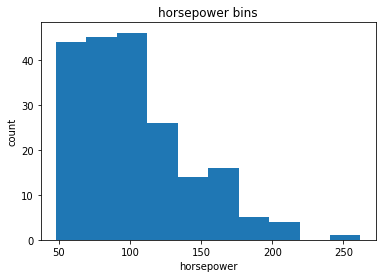

In [14]:
plt.hist(df["horsepower"])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()

We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).

Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).

Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.

We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.

In [15]:
# we want 3 bins but Bin labels must be one fewer than the number of bin edges so we use 4 bins
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [16]:
group_names = ['Low', 'Medium', 'High']
# Use `pd.ut` when you need to segment and sort data values into bins
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
# the number of vehicles in each bin:
print(df['horsepower-binned'].value_counts())
df[['horsepower','horsepower-binned']].head()

Low       151
Medium     45
High        5
Name: horsepower-binned, dtype: int64


,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low


Let's plot the distribution of each bin:

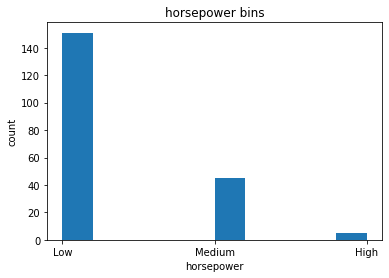

In [17]:
plt.hist(df['horsepower-binned'])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("horsepower bins")
plt.show()

Look at the dataframe above carefully. You will find that the last column provides the bins for "horsepower" based on 3 categories ("Low", "Medium" and "High").

We successfully narrowed down the intervals from 59 to 3!

### Indicator Variable (or Dummy Variable)
##### What is an indicator variable?
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

Why we use indicator variables?

We use indicator variables so we can use categorical variables for regression analysis in the later modules.

Example
We see the column "fuel-type" has two unique values: "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" to indicator variables.

We will use method `pd.get_dummies` to assign numerical values to different categories of fuel type.

In [18]:
dummy_variable_fuel = pd.get_dummies(df['fuel-type'])
dummy_variable_fuel.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Change the column names for clarity:

In [19]:
dummy_variable_fuel.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_fuel.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [20]:
# merge data frame "df" and "dummy_variable_fuel" 
df = pd.concat([df, dummy_variable_fuel], axis=1)

# drop original column "fuel-type" from "df"
df.drop('fuel-type', axis = 1, inplace=True)

In [21]:
dummy_variable_aspiration = pd.get_dummies(df['aspiration'])
dummy_variable_aspiration.rename(columns={'std':'aspiration-std', 'turbo':'aspiration-turbo'}, inplace=True)
# merge data frame "df" and "dummy_variable_aspiration" 
df = pd.concat([df, dummy_variable_aspiration], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

Save the new csv:

In [22]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,21,27,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,19,26,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,24,30,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,18,22,17450.0,Low,0,1,1,0


In [23]:
df.to_csv('clean_df.csv', index=False)